In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [28]:
df = pd.read_csv('/Users/chanakya/Desktop/School/SEM 6/Employee-Attrition.csv')
def encode(d):
    switcher={
        'Yes': 1,
        'No': 0
    }
    return switcher.get(d)

df['Attrition'] = df['Attrition'].apply(encode)
df['OverTime'] = df['OverTime'].apply(encode)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
df_x = df[['JobLevel','StockOptionLevel','JobSatisfaction','EnvironmentSatisfaction','OverTime','Age','TotalWorkingYears','YearsAtCompany','MonthlyIncome']]
df_y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state =0 )

# Data Preprocessing (Over Sampling the Minority Class)

In [30]:
X = pd.concat([X_train,y_train],axis=1)
X

,JobLevel,StockOptionLevel,JobSatisfaction,EnvironmentSatisfaction,OverTime,Age,TotalWorkingYears,YearsAtCompany,MonthlyIncome,Attrition
338,2,3,3,4,0,30,10,10,6118,0
363,1,0,3,4,1,33,1,1,2851,1
759,1,0,2,2,0,45,6,6,2177,0
793,1,1,3,1,0,28,4,4,2207,0
581,1,2,3,4,0,30,7,2,3833,0
...,...,...,...,...,...,...,...,...,...,...
763,1,1,3,3,1,34,1,1,2220,0
835,1,0,3,3,0,35,6,5,4323,0
1216,2,1,4,4,1,43,10,10,7847,0
559,1,1,3,4,1,38,6,1,3057,0


In [31]:
y_a = X[X.Attrition == 1]
n_a = X[X.Attrition == 0]

In [32]:
y_a_s = resample(y_a, replace=True, n_samples=len(n_a), random_state=0)
df_s = pd.concat([y_a_s, n_a])
df_s_x = df_s.drop(['Attrition'], axis=1)
df_s_y = df_s.Attrition
df_s['Attrition'].value_counts()/1724*100   

1    50.0
0    50.0
Name: Attrition, dtype: float64

From the above distribution table we can say that the minority class had been oversampled with data and now lets check the accuracy_score with our models.

# Logistic Regression with OverSampled Data

In [33]:
X_train, X_test,y_train, y_test = train_test_split(df_s_x,df_s_y, test_size=0.3, random_state=0)
log_reg = LogisticRegression(max_iter = 1000).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       269
           1       0.75      0.69      0.72       249

    accuracy                           0.74       518
   macro avg       0.74      0.74      0.74       518
weighted avg       0.74      0.74      0.74       518



In [34]:
cvs = cross_val_score(log_reg,df_s_x, df_s_y, cv=10, scoring='accuracy')
cvs.mean()*100

72.90966527759109

# KNN with OverSampled Data

In [35]:
knn = KNeighborsClassifier().fit(X_train, y_train)
y_predi = knn.predict(X_test)
accuracy_score(y_predi, y_test)*100

78.18532818532819

In [36]:
print(classification_report(y_test, y_predi))

              precision    recall  f1-score   support

           0       0.88      0.68      0.76       269
           1       0.72      0.90      0.80       249

    accuracy                           0.78       518
   macro avg       0.80      0.79      0.78       518
weighted avg       0.80      0.78      0.78       518



In [37]:
cvs_knn = cross_val_score(knn, df_s_x, df_s_y, scoring ='accuracy', cv=10)
cvs_knn.mean()*100

78.54281489447506

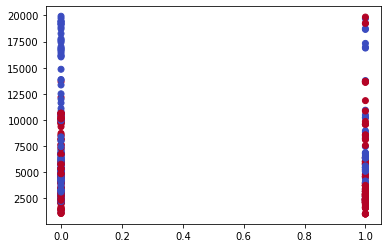

In [38]:
plt.scatter(X_test['OverTime'], X_test['MonthlyIncome'], c=y_predi, cmap='coolwarm')

We can observe that with oversampling the models accuracy score went down but one drastic change can be observed which is the change in the recall in detecting 1's which is not present in our predictions made in 'Lab8-1.ipynb' file. We could have also undersampled the data but that would leave valuable data so we oversample instead. Now lets implement hyperparameter tuning on these methods.

# Hyperparameter Tuning (GridSearchCV and RandomizedSearchCV)

In [45]:
p = np.logspace(-5,8,18)
param_grid = {"C" : p}
logreg_CV = GridSearchCV(log_reg, param_grid, cv=5)
logreg_CV.fit(X_train, y_train)
logreg_CV.best_params_

{'C': 508021.80469130125}

In [51]:
logreg_CV.best_score_*100

71.1412503000583

In [53]:
paramgrid = {
    'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform','distance'],
    'metric' :['euclidean','manhattan']
}
knn_CV = GridSearchCV(knn, paramgrid, cv=3, verbose=1, n_jobs = -1)
knn_CV.fit(X_train, y_train)
knn_CV.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.5s finished


{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [54]:
knn_CV.best_score_*100

81.17744610281925

From the above observations we can declare that kNN Model than Logistic Regression and is giving us the best result with proper parameter tuning and the values obtained are {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'} with the score of '81.177'

# Hyperparameter Tuning (RandomizedSearchCV)

In [59]:
logreg_CV2 = RandomizedSearchCV(log_reg, param_grid, cv=5)
logreg_CV2.fit(X_train, y_train)
logreg_CV2.best_params_
logreg_CV2.best_estimator_

LogisticRegression(C=508021.80469130125, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
logreg_CV2.best_score_*100

71.1412503000583

In [57]:
knn_CV2 = RandomizedSearchCV(knn, paramgrid, cv=3, verbose=1, n_jobs = -1)
knn_CV2.fit(X_train, y_train)
knn_CV2.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished


{'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean'}

In [58]:
knn_CV2.best_score_*100

81.17744610281925

From the above observations we can declare that kNN Model than Logistic Regression and is giving us the best result with proper parameter tuning and the values obtained are {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'} with the score of '81.177'.